In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from backtest import run_backtest
from strategy import RandomStrategy, CarbonAwareStrategy

Total emissions: 1652 lbs/MWh


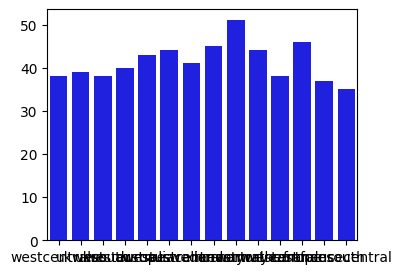

In [2]:
selections, emissions, rounds = run_backtest("history.csv", strategy=RandomStrategy(clients_per_round=3))
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=list(selections.keys()), y=list(selections.values()), color="blue", ax=ax)
print(f"Total emissions: {sum(emissions.values()) / rounds:.0f} lbs/MWh")

Total emissions: 1526 lbs/MWh


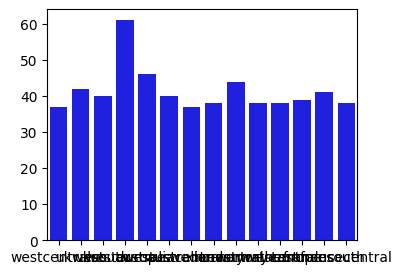

In [9]:
selections, emissions, rounds = run_backtest("history.csv", strategy=CarbonAwareStrategy(clients_per_round=3, max_forecast_duration=36))
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=list(selections.keys()), y=list(selections.values()), color="blue", ax=ax)
print(f"Total emissions: {sum(emissions.values()) / rounds:.0f} lbs/MWh")